# Conversión Análogo a Digital (ADC)

Objetivos:


1.   Conocer, entender e implementar el proceso ADC
2.   Comprender, manipular y analizar diferentes cambios que ocurren en las señales durante el proceso de ADC cuando se modifican ciertos parámetros, e.g., frecuencia de muestreo, número de bits de cuantización, etc.



# Funciones

In [31]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
import warnings
warnings.filterwarnings('ignore')
def sample_and_hold(t_org, signal, fs_ori, fs_dest):
  t_dest = 1/fs_dest
  i = 0
  signal_resample = np.zeros(len(signal))
  samples = []
  t_sample= []
  while i* t_dest < max(t_org):
    idx_sample = np.where((t_org >= i *t_dest) & (t_org < i + 1 * t_dest))[0]
    signal_resample[idx_sample[0]: idx_sample[-1] +1 ] = signal[idx_sample[0]]
    samples.append(signal[idx_sample[0]])
    t_sample.append(i *t_dest)
    i += 1
  return signal_resample, t_sample, samples


def fxquant (s , bit ) :
  # s : señal de entrada normalizada entre -1 y 1
  # bit : bits de cuantizacion
  Plus1 = np.power(2,(bit-1))
  X = s*Plus1
  X = np.round(X)
  X = np.minimum(Plus1-1.0, X)
  X = np.maximum(-1.0*Plus1,X)
  X = X/Plus1
  return X

def plot_spectrogram(data, fs):
  '''
  Parameter:
  data: señal a la que se le calcula el espectrograma
  fs: frecuencia de muestreo de la señal
  '''
  # Resolución del espectrograma
  num =  1024
  hop = num//8

  stft = np.abs(librosa.stft(data,  n_fft=num, hop_length=hop  ))
  D = librosa.amplitude_to_db(stft, ref = np.max)
  spec = librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='linear', cmap=None, hop_length=hop)

## Señal senoidal

(1)   Cree una señal senoidal con una $f_{max} = 10 kHz$. Construya una figura que muestre 3 periodos de la señal.

(2)   Use la función 'sample_and_hold' (provista en esta guía) para realizar el muestreo de la señal usando las diferentes frecuencias que se presentan a continuación: $\frac{f_{max}}{4}, \frac{f_{max}}{2}, f_{max}, 2f_{max}$.

(3)  Use la función 'fxquant' (provista en esta guía) para realizar el proceso de cuantización. Luego cambie la cantidad de bits de cuantización usando: $2, 3, 4, 5, \text{y } 6 $ bits


Grafico señal Senoidal 1.1


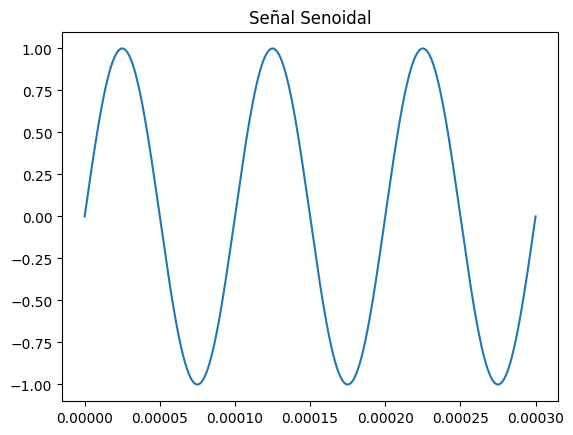

Grafico señal muestreada 1.2


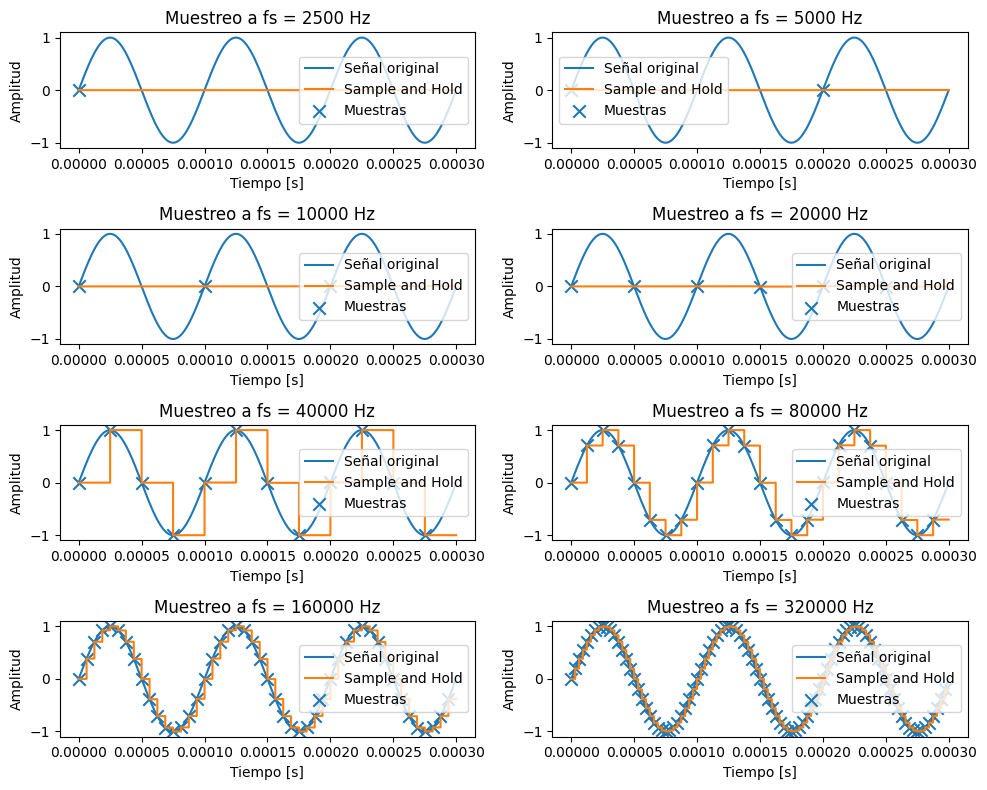

Grafico señal cuantizada 1.3


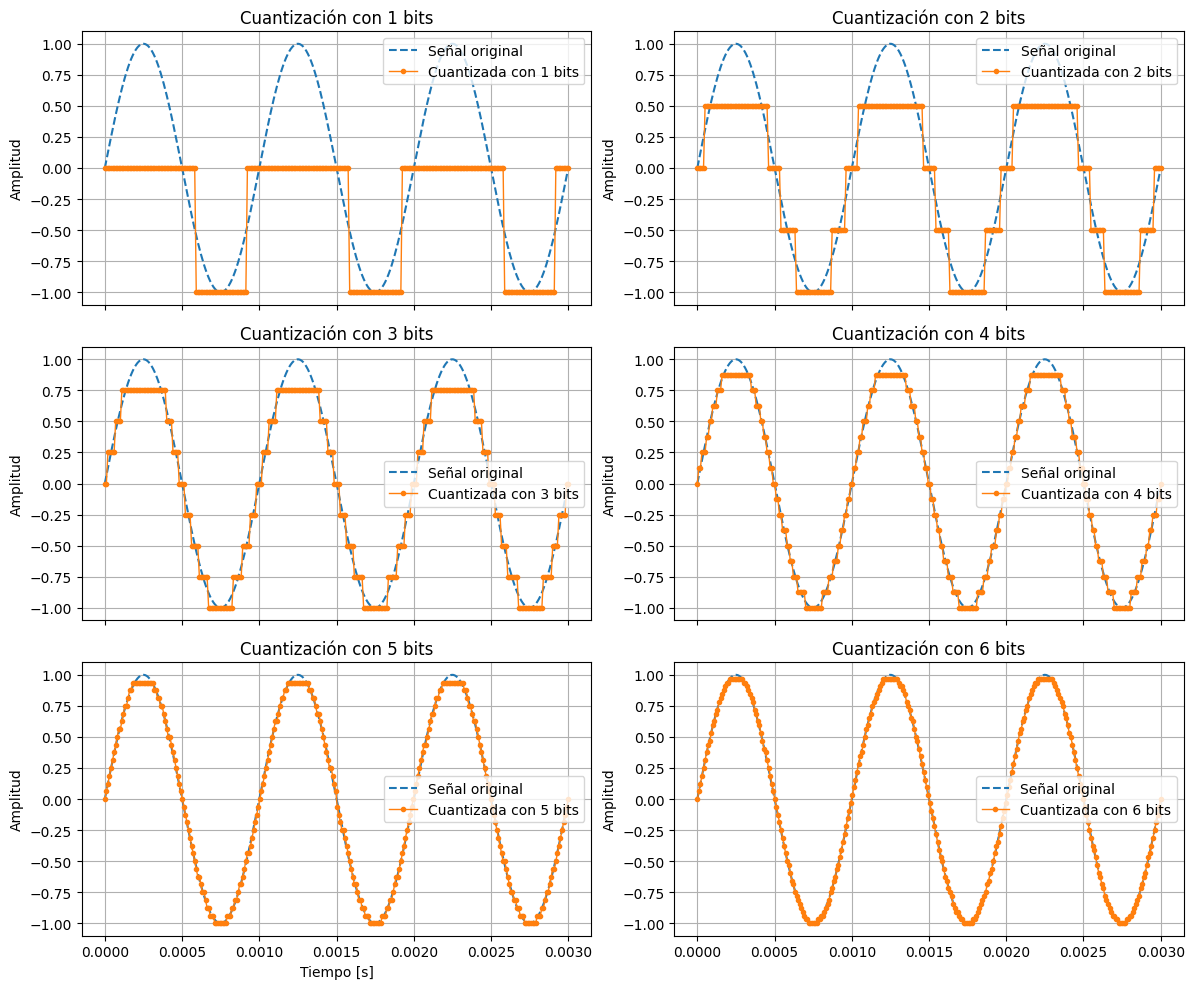

In [32]:
#Solucion Señal Senoidal
def ejercicio1_1(frecuencia=10000, muestras_por_ciclo=1000, ciclos=3, graficar=0):
    periodo = 1 / frecuencia  # Periodo de la señal
    t = np.linspace(0, ciclos * periodo, ciclos * muestras_por_ciclo)
    senal = np.sin(2 * np.pi * frecuencia * t)
    if graficar == 1:
        plt.plot(t, senal)
        plt.title('Señal Senoidal')
        plt.show()

    return senal, t

def ejercicio1_2():
    f_max = 10_000  # Hz

    # Generamos la señal original (3 períodos) con alta resolución
    muestras_por_ciclo = 1000   # Ajusta este valor para mayor o menor resolución
    ciclos = 3
    senal, t = ejercicio1_1(f_max, muestras_por_ciclo, ciclos)

    # Frecuencia de muestreo "original" (para compatibilidad con la firma de la función)
    fs_ori = f_max * muestras_por_ciclo  

    # Definimos las diferentes frecuencias de muestreo
    fs_list = [f_max/4, f_max/2, f_max, 2*f_max, 4*f_max, 8*f_max, 16*f_max, 32*f_max]

    plt.figure(figsize=(10, 8))

    for i, fs_dest in enumerate(fs_list, start=1):
        # Obtenemos la señal muestreada con sample-and-hold
        s_resample, t_samp, samples = sample_and_hold(t, senal, fs_ori, fs_dest)
        
        plt.subplot(4, 2, i)
        # Señal original
        plt.plot(t, senal, label='Señal original')
        # Señal sample-and-hold (onda escalonada)
        plt.step(t, s_resample, where='post', label='Sample and Hold')
        # Puntos de muestreo (con marcador y tamaño amplificado)
        plt.scatter(t_samp, samples, marker='x', s=80, label='Muestras')
        
        plt.title(f'Muestreo a fs = {fs_dest:.0f} Hz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.legend()

    plt.tight_layout()
    plt.show()

def ejercicio1_3():
    # Parámetros de la señal
    frecuencia = 1000           # Frecuencia en Hz
    muestras_por_ciclo = 100    # Muestras por cada ciclo
    ciclos = 3                # Número de ciclos de la señal
    
    # Generar la señal original
    senal, t = ejercicio1_1(frecuencia, muestras_por_ciclo, ciclos, 0)
    
    # Lista de bits para cuantización
    bits_list = [1, 2, 3, 4, 5, 6]
    
    # Crear subplots: 3 filas, 2 columnas
    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
    axes = axes.flatten()  # Aplanar para iterar fácilmente
    
    for ax, bits in zip(axes, bits_list):
        # Cuantización de la señal con el número de bits actual
        senal_cuantizada = fxquant(senal, bits)
        
        # Graficar la señal original (línea discontinua) y la cuantizada
        ax.plot(t, senal, label='Señal original', linestyle='--')
        ax.plot(t, senal_cuantizada, label=f'Cuantizada con {bits} bits', marker='o', markersize=3, linewidth=1)
        ax.set_title(f'Cuantización con {bits} bits')
        ax.set_ylabel('Amplitud')
        ax.legend()
        ax.grid(True)
    
    # Eliminar subplots vacíos si hay menos de 6 niveles de cuantización
    for i in range(len(bits_list), len(axes)):
        fig.delaxes(axes[i])
    
    axes[-2].set_xlabel('Tiempo [s]')  # Etiqueta en el penúltimo subplot
    plt.tight_layout()
    plt.show()
print("Grafico señal Senoidal 1.1")
ejercicio1_1(10000, 1000, 3, graficar=1)
print("Grafico señal muestreada 1.2")
ejercicio1_2()
print("Grafico señal cuantizada 1.3")
ejercicio1_3()


## Señal de audio

Repita los procesos de muestreo y cuantización para el archivo de audio
'sample.wav' el cual fue grabado a una frecuencia de muestreo de 8000Hz. Para el proceso de muestreo de la señal de audio use la función 'resample' de la libreria scipy.signal ya que la función sample_and_hold no es eficiente pues está pensada meramente para fines educativos/ilustrativos.

(1) Analice el comportamiento de un segmento de 40ms de la señal muestreada. Compare el resultado de este segmento para diferentes valores de Fs respecto a la señal original. Analice y concluya.

(2) Considere nuevamente la señal de audio completa ('sample.wav') y segmente un pedazo de 500ms. Usando la función 'plot_spectrogram' (provista en esta guía), analice los resultados que se obtenienen a nivel espectral al muestrear a las diferentes frecuencias Fs. Analice y concluya. Asegúrese de usar los mismos límites para los ejes en todas las figuras.

(3) Escuche cómo cambia el audio completo a medida que cambian los diferentes valores de la Fs.

(4) Considere nuevamente el segmento de 20ms y analice el efecto de variar la cantidad de bits de cuantización. Analice y concluya.

(5) Tome nuevamente el segmento de 500ms de audio y use la función 'plot_spectrogram' (provista en esta guía) para analizar el efecto que tiene cambiar la cantidad de bits de cuantización. Analice y concluya.

(6) Escuche cómo cambia el audio completo a medida que cambia la cantidad de bits de cuantización.

(7) Compare los espectrogramas antes construidos con el espectrograma calculado para todo el audio completo ('sample.wav').


comportamiento de la señal Muestreada 2.1


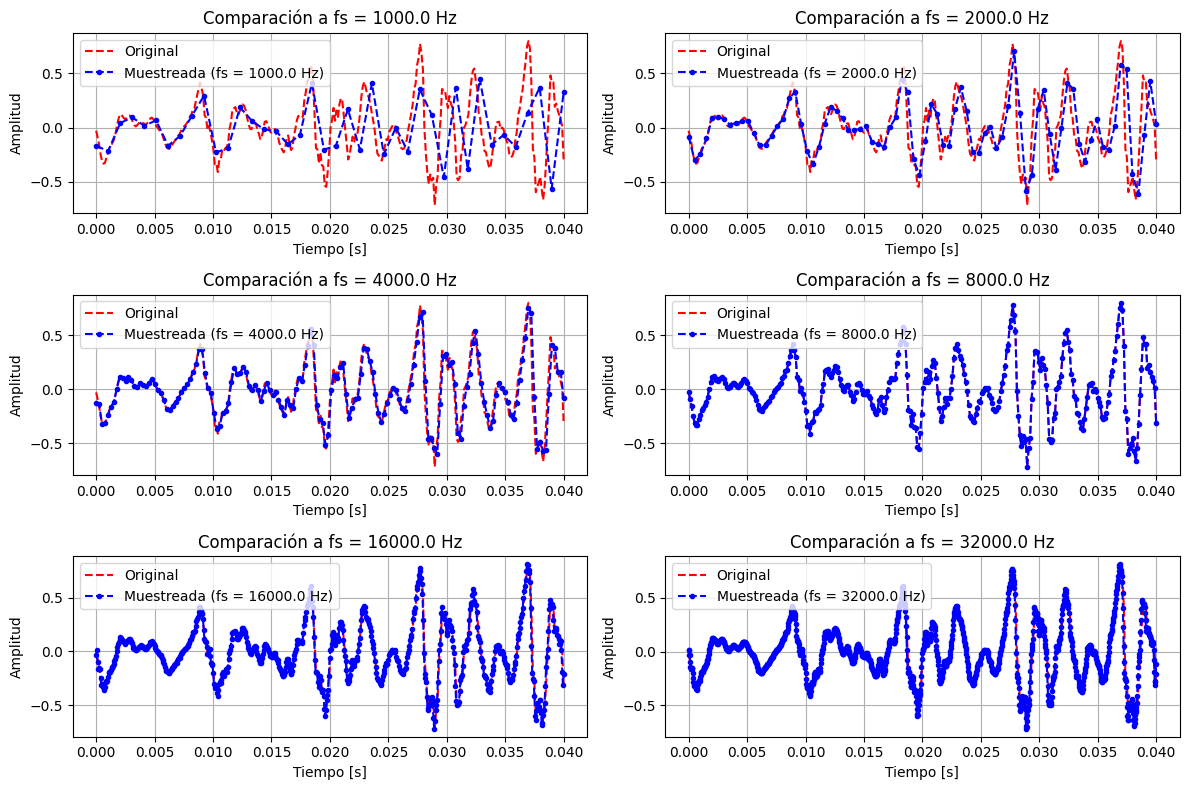

espectrograma de la señal Muestreada 2.2


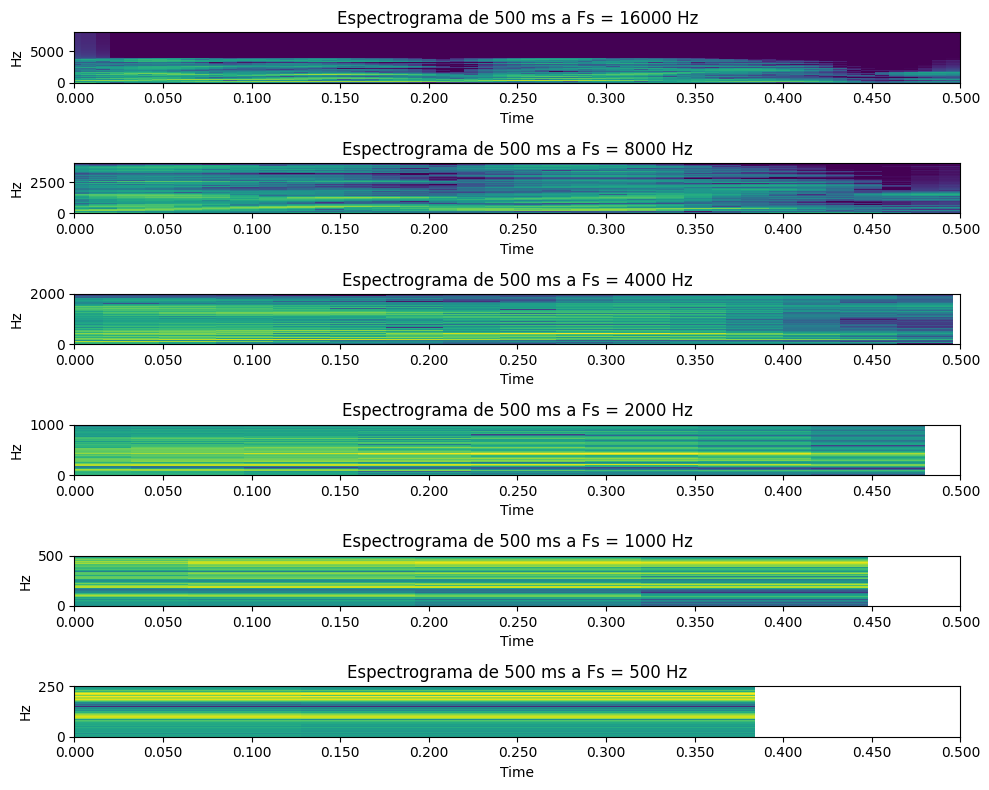

reproduccion de la señal Muestreada 2.3

🎧 Audio a 8000 Hz:



🎧 Audio a 4000 Hz:



🎧 Audio a 2000 Hz:



🎧 Audio a 1000 Hz:


Comportamiento de la señal Cuantizada 2.4


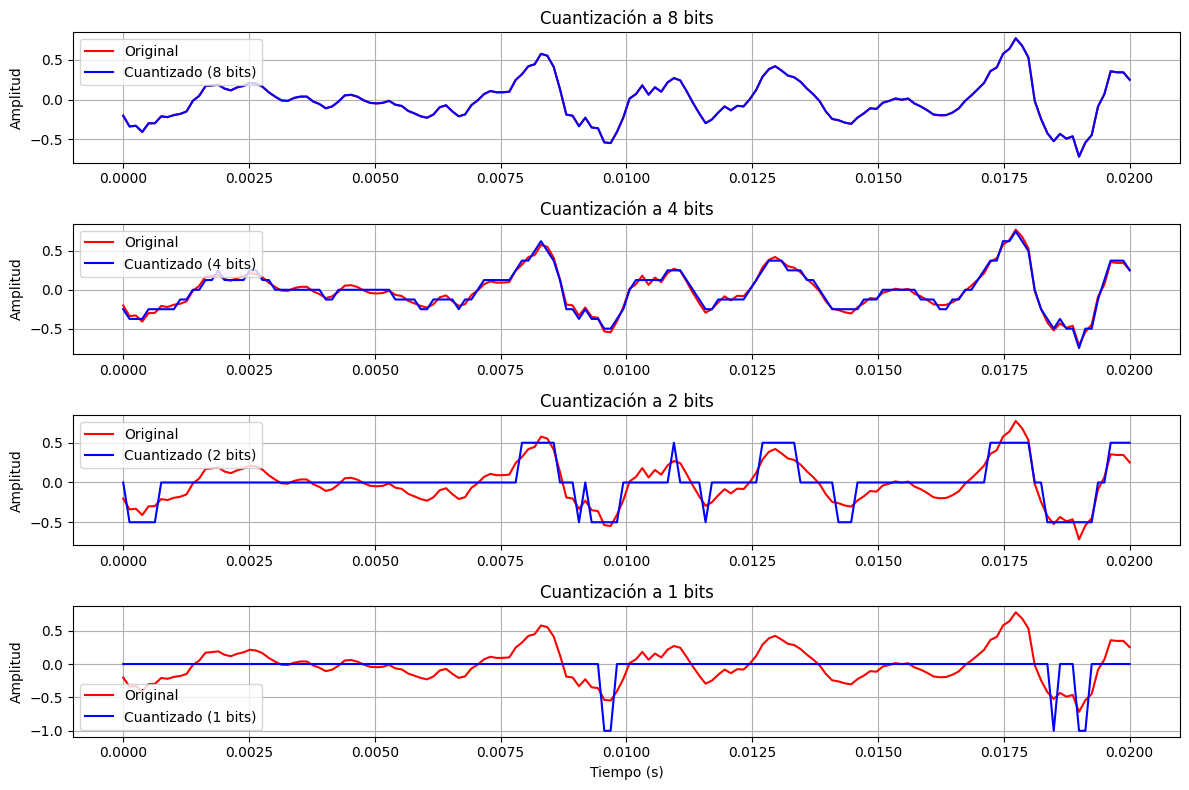

Espectrograma de la señal Cuantizada 2.5


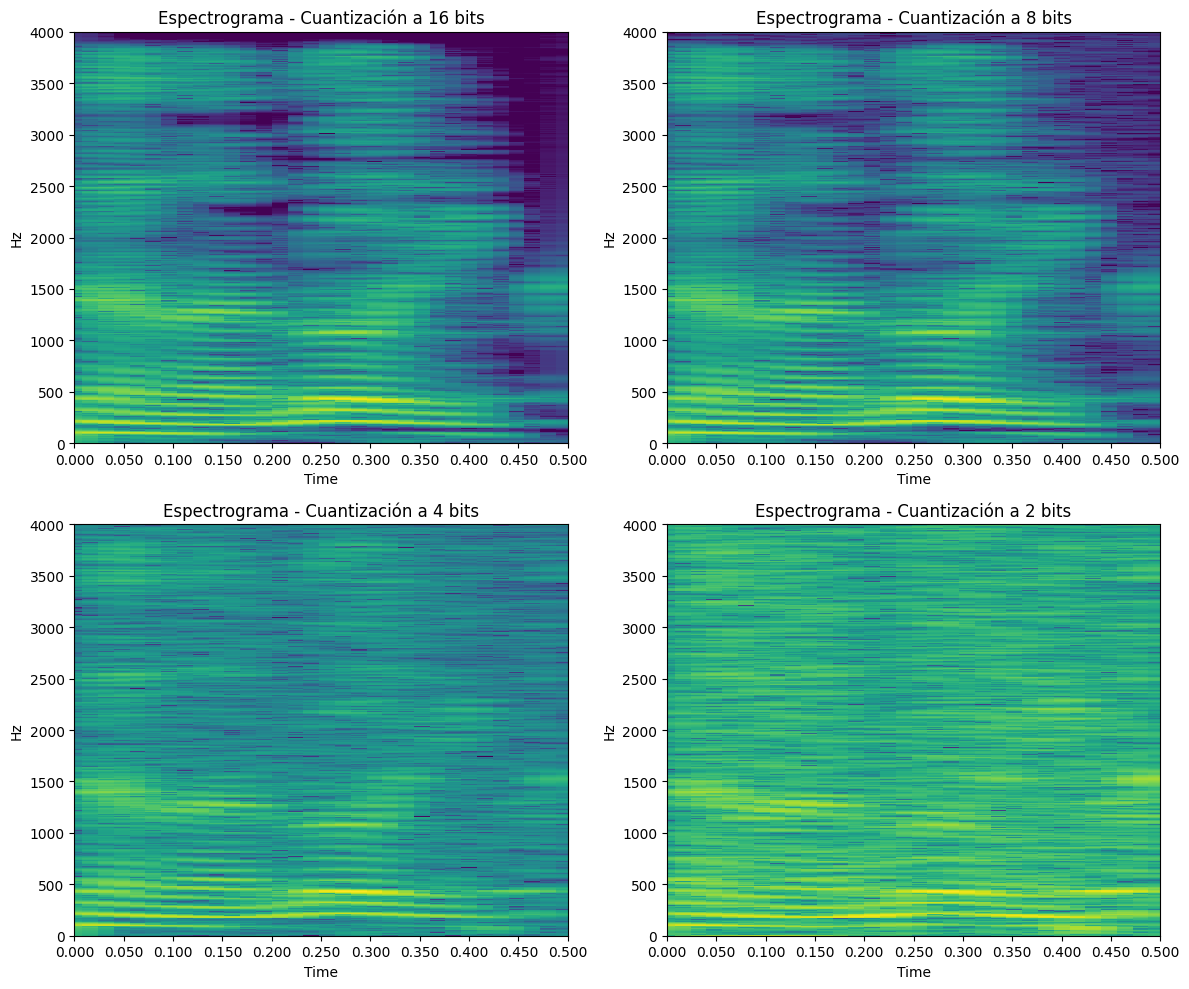

Reproduccion de la señal Cuantizada 2.6

🎧 Reproduciendo audio completo a 16 bits:



🎧 Reproduciendo audio completo a 8 bits:



🎧 Reproduciendo audio completo a 4 bits:



🎧 Reproduciendo audio completo a 2 bits:



🎧 Reproduciendo audio completo a 1 bits:


Espectrograma de toda el audio 2.7


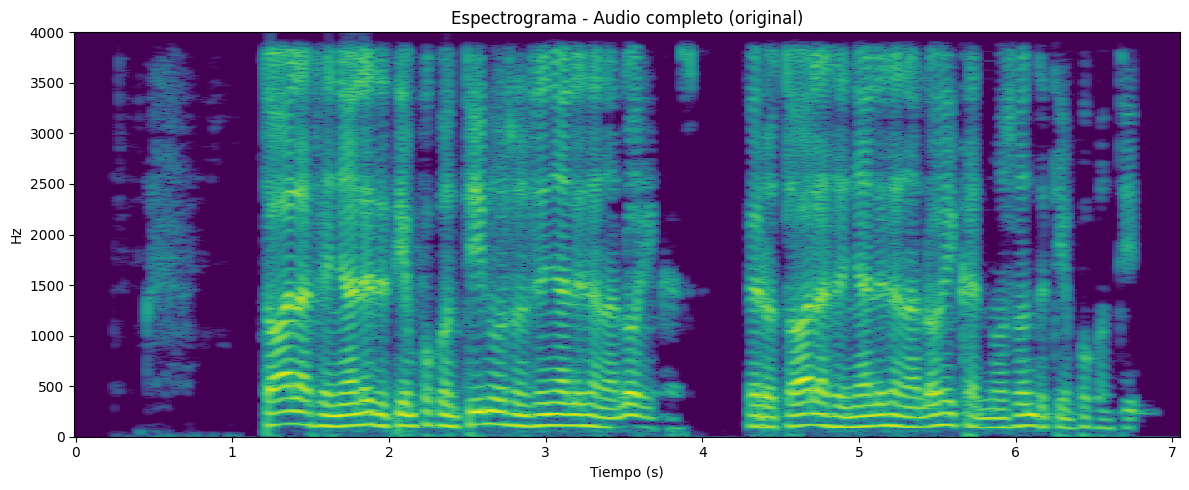

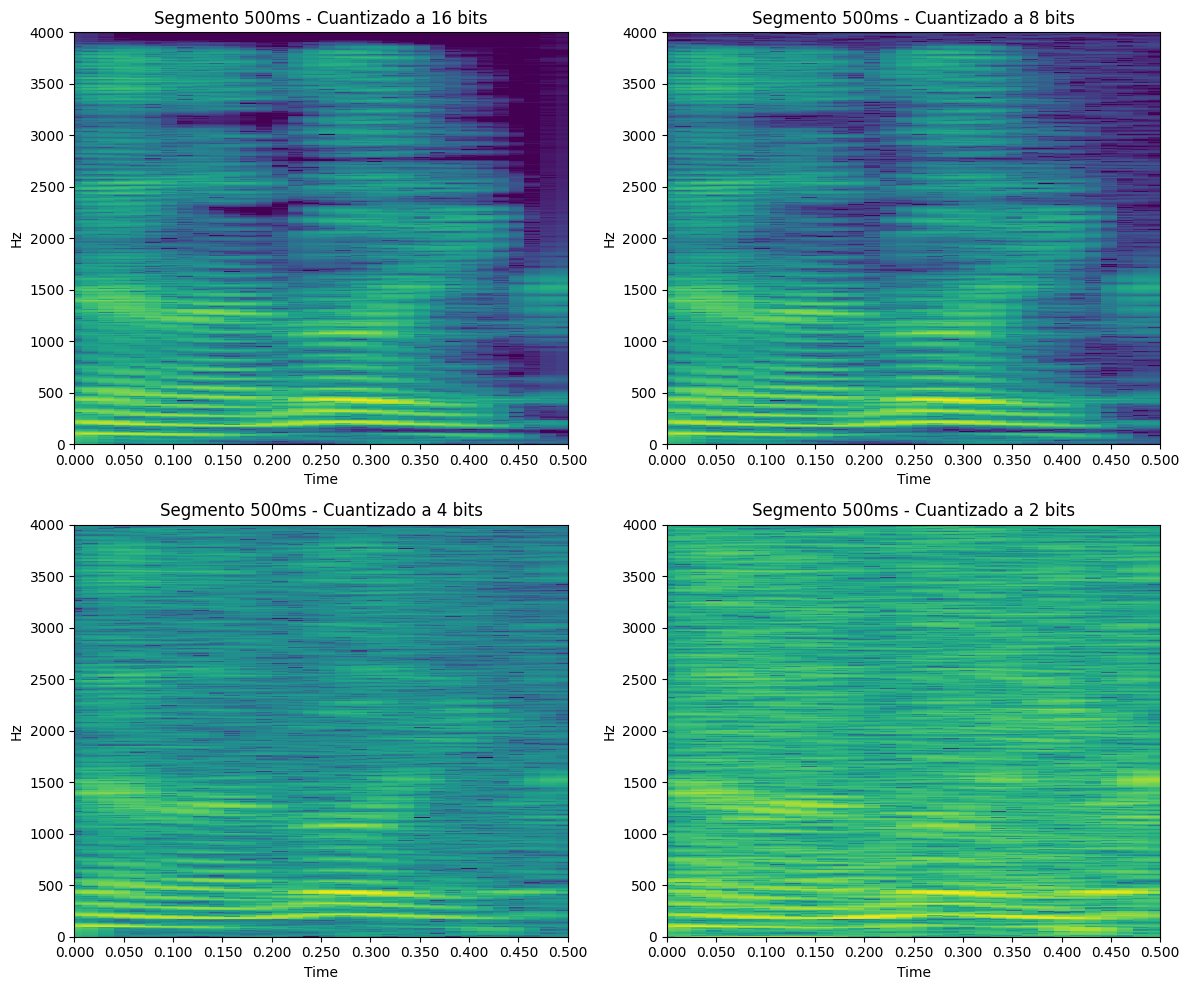

In [33]:
def ejercicio2_1(audio_path):
    signal, fs = librosa.load(audio_path, sr=None)
    
    # Convertir a mono si es necesario
    if signal.ndim > 1:
        signal = signal.mean(axis=0)

    # Duración de 40 ms en muestras
    duration_ms = 40
    duration_samples = int((duration_ms / 1000) * fs)

    # Seleccionar 40 ms desde la mitad del audio
    mid_point = len(signal) // 2
    start_sample = max(0, mid_point - duration_samples // 2)
    end_sample = min(len(signal), start_sample + duration_samples)
    signal_segment = signal[start_sample:end_sample]

    fs_dests = [fs/8, fs / 4, fs / 2, fs, fs * 2, fs * 4]

    plt.figure(figsize=(12, 8))

    for i, fs_dest in enumerate(fs_dests, start=1):
        # Muestrear signal_segment con la frecuencia fs_dest
        num_samples = int(len(signal_segment) * fs_dest / fs)
        signal_resample = resample(signal_segment, num_samples)

        # Graficar la señal original y la muestreada
        plt.subplot(3, 2, i)
        t_original = np.linspace(0, duration_ms / 1000, len(signal_segment))
        t_resample = np.linspace(0, duration_ms / 1000, num_samples)
        plt.plot(t_original, signal_segment, label='Original', linestyle='--', color='red', alpha=1)
        plt.plot(t_resample, signal_resample, label=f'Muestreada (fs = {fs_dest:.1f} Hz)', color='blue', linestyle='--', marker='o', markersize=3)
        plt.title(f'Comparación a fs = {fs_dest:.1f} Hz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

def ejercicio2_2(audio_path):


    data, fs_original = librosa.load(audio_path, sr=None)  # sr=None para conservar Fs original

# Extraemos 500 ms (0.5 segundos):
    segment_duration = 0.5
    N = int(segment_duration * fs_original)
    mid_point = len(data) // 2
    start_sample = max(0, mid_point - N // 2)
    end_sample = min(len(data), start_sample + N)
    segment_500ms = data[start_sample:end_sample]

    # Distintas frecuencias de muestreo a evaluar
    Fs_list = [16000, 8000, 4000, 2000, 1000, 500]

    plt.figure(figsize=(10, 8))

    for i, Fs in enumerate(Fs_list):
        # Resampleamos el mismo segmento de 500 ms a Fs
        segment_resampled = librosa.resample(segment_500ms, orig_sr=fs_original, target_sr=Fs)
        
        plt.subplot(len(Fs_list), 1, i+1)
        plot_spectrogram(segment_resampled, Fs)
        
        # Mantener ejes consistentes (hasta 0.5 s en tiempo y ~22 kHz en frecuencia)
        plt.xlim([0, 0.5])    # Hasta 0.5 s
        plt.ylim([0, Fs/2]) 
        plt.title(f"Espectrograma de 500 ms a Fs = {Fs} Hz")

    plt.tight_layout()
    plt.show()

def ejercicio2_3(audio_path):
    audio, fs_original = librosa.load(audio_path, sr=8000)

    fs_list = [8000, 4000, 2000, 1000]
    for fs_target in fs_list:
        tramo = librosa.resample(audio, orig_sr=fs_original, target_sr=fs_target)
        
        print(f"\n🎧 Audio a {fs_target} Hz:")
        display(Audio(tramo, rate=fs_target))
def ejercicio2_4(audio_path):

    audio, fs = librosa.load(audio_path, sr=None)

    # Extraer segmento de 20 ms desde el centro
    duration_ms = 20
    segment_samples = int((duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - segment_samples // 2
    end = start + segment_samples
    segment = audio[start:end]

    # Función de cuantización
    # Preparar datos
    bit_depths = [8, 4, 2, 1]
    quantized_segments = [fxquant(segment, bits) for bits in bit_depths]
    t = np.linspace(0, duration_ms / 1000, segment_samples)

    # Graficar
    plt.figure(figsize=(12, 8))

    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(len(bit_depths), 1, i + 1)
        plt.plot(t, segment, label='Original', color='red', alpha=1)
        plt.plot(t, q_segment, label=f'Cuantizado ({bits} bits)', color='blue')
        plt.title(f'Cuantización a {bits} bits')
        plt.ylabel('Amplitud')
        plt.grid(True)
        plt.legend()

    plt.xlabel('Tiempo (s)')
    plt.tight_layout()
    plt.show()
def ejercicio2_5(filepath):
    '''
    Toma un segmento de 500ms del audio, lo cuantiza a diferentes niveles de bits
    y grafica los espectrogramas correspondientes usando la función dada.
    
    Parámetro:
    - filepath: ruta al archivo .wav
    '''
    # Cargar audio
    audio, fs = librosa.load(filepath, sr=None)

    # Extraer 500 ms desde el centro
    duration_ms = 500
    segment_samples = int((duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - segment_samples // 2
    end = start + segment_samples
    segment = audio[start:end]

    # Cuantización
    def quantize(segment, bits):
        levels = 2 ** bits
        norm = segment / np.max(np.abs(segment))         # Normalizar a [-1, 1]
        scaled = (norm + 1) / 2                           # Escalar a [0, 1]
        quantized = np.round(scaled * (levels - 1)) / (levels - 1)
        quantized = (quantized * 2) - 1                   # Volver a [-1, 1]
        return quantized

    # Profundidades de bits a probar
    bit_depths = [16, 8, 4, 2]
    quantized_segments = [quantize(segment, bits) for bits in bit_depths]

    # Graficar espectrogramas
    plt.figure(figsize=(12, 10))

    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(2, 2, i + 1)
        plot_spectrogram(q_segment, fs)
        plt.title(f'Espectrograma - Cuantización a {bits} bits')
        plt.ylim([0, fs // 2])  # Límite de Nyquist
        plt.xlim([0, 0.5])      # 500 ms

    plt.tight_layout()
    plt.show()

def ejercicio2_6(filepath):
    '''
    Carga un audio completo y lo reproduce cuantizado a diferentes niveles de bits.
    
    Parámetro:
    - filepath: ruta al archivo .wav
    '''
    # Cargar audio completo
    audio, fs = librosa.load(filepath, sr=None)

    # Función de cuantización

    # Profundidades de bits a probar
    bit_depths = [16, 8, 4, 2, 1]

    for bits in bit_depths:
        audio_q = fxquant(audio, bits)
        print(f"\n🎧 Reproduciendo audio completo a {bits} bits:")
        display(Audio(audio_q, rate=fs))
def ejercicio2_7(filepath):
    '''
    Compara el espectrograma del audio completo con los espectrogramas de segmentos
    cuantizados a 16, 8, 4 y 2 bits (500 ms).
    '''
    # Cargar audio completo
    audio, fs = librosa.load(filepath, sr=None)

    # Calcular espectrograma del audio completo
    plt.figure(figsize=(12, 5))
    plt.title("Espectrograma - Audio completo (original)")
    plot_spectrogram(audio, fs)
    plt.ylim([0, fs // 2])
    plt.xlabel("Tiempo (s)")
    plt.tight_layout()
    plt.show()

    # Extraer segmento de 500 ms desde el centro
    segment_duration_ms = 500
    N = int((segment_duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - N // 2
    end = start + N
    segment = audio[start:end]

    # Función de cuantización
    def quantize(signal, bits):
        levels = 2 ** bits
        norm = signal / np.max(np.abs(signal))
        scaled = (norm + 1) / 2
        q = np.round(scaled * (levels - 1)) / (levels - 1)
        return (q * 2) - 1

    # Cuantizaciones a comparar
    bit_depths = [16, 8, 4, 2]
    quantized_segments = [quantize(segment, bits) for bits in bit_depths]

    # Graficar espectrogramas de los segmentos cuantizados
    plt.figure(figsize=(12, 10))
    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(2, 2, i + 1)
        plot_spectrogram(q_segment, fs)
        plt.title(f'Segmento 500ms - Cuantizado a {bits} bits')
        plt.ylim([0, fs // 2])
        plt.xlim([0, 0.5])
    plt.tight_layout()
    plt.show()
print("comportamiento de la señal Muestreada 2.1")
ejercicio2_1("C:/Users/Miguel/sample.wav")
print("espectrograma de la señal Muestreada 2.2")
ejercicio2_2("C:/Users/Miguel/sample.wav")
print("reproduccion de la señal Muestreada 2.3")
ejercicio2_3("C:/Users/Miguel/sample.wav")
print("Comportamiento de la señal Cuantizada 2.4")
ejercicio2_4("C:/Users/Miguel/sample.wav")
print("Espectrograma de la señal Cuantizada 2.5")
ejercicio2_5("C:/Users/Miguel/sample.wav")
print("Reproduccion de la señal Cuantizada 2.6")
ejercicio2_6("C:/Users/Miguel/sample.wav")
print("Espectrograma de toda el audio 2.7")
ejercicio2_7("C:/Users/Miguel/sample.wav")
